Based on MinimalRealisticSimulation.ipynb

In [1]:
import os
import sys

# Define the path you want to add
new_path = os.path.abspath('../src')

# Insert the path at the beginning of the list to give it priority
if new_path not in sys.path:
    sys.path.insert(0, new_path)

In [2]:
# Load required modules
%matplotlib inline

from IPython.display import display

#For plotting
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.rcParams["animation.html"] = "jshtml"
mpl.rcParams['figure.facecolor'] = 'white'

# Import relevant modules from within GPU Ocean
from gpuocean.SWEsimulators import GPUOceanSim
from gpuocean.utils import IPythonMagic, NetCDFInitialization, PlotHelper

/lustre/storeA/users/martinls/src/gpuocean_anthony/src/gpuocean/utils/NetCDFInitialization.py:35: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


In [3]:
# Create the GPU context
%cuda_context_handler gpu_ctx

In [4]:
# Url or path to operational ocean forecast
source_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'

# Use a predefined subdomain
casename = 'lofoten'

# Load initial and boundary conditions, bathymetry, landmask, forcing, etc
sim_args = NetCDFInitialization.getInitialConditionsNorKystCases(source_url, casename)

In [35]:
print("Timesteps offset from first timestep (in hours):")
print(sim_args['timesteps']/60/60)


Timesteps offset from first timestep (in hours):
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


In [22]:
sim_args_offset = NetCDFInitialization.getInitialConditionsNorKystCases(source_url, casename, timestep_indices=[[12]])


In [36]:
print("Timesteps offset from first timestep (in hours):")
print(sim_args_offset['timesteps']/60/60)

print("Difference in t0 (first timestep, in hours):")
print((sim_args_offset['t0']-sim_args['t0'])/60/60)


Timesteps offset from first timestep (in hours):
[0.]
Difference in t0 (first timestep, in hours):
12.0


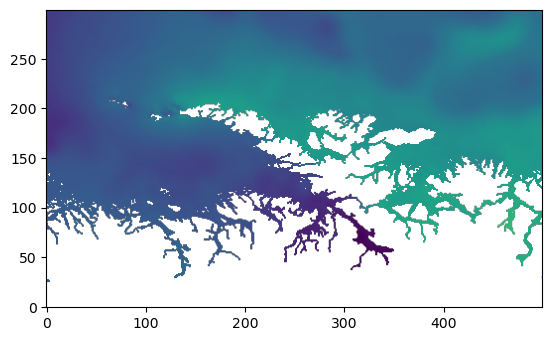

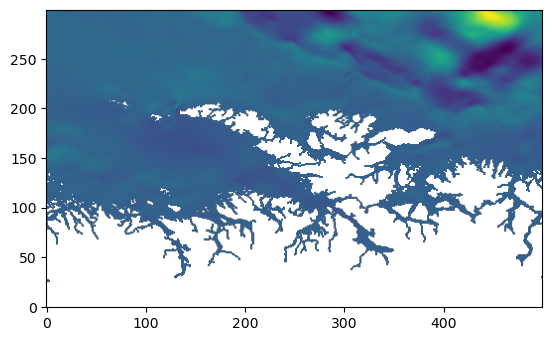

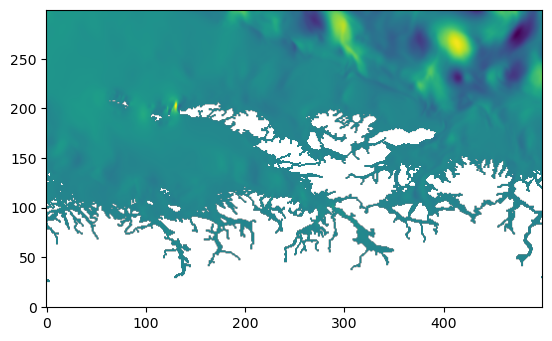

In [5]:
# Plot initial conditions (from Norkyst)

plt.imshow(sim_args['eta0'], origin='lower')
plt.show()
plt.imshow(sim_args['hu0'], origin='lower')
plt.show()
plt.imshow(sim_args['hv0'], origin='lower')

This will give inaccurate coriolis along the border!
This will give inaccurate angle along the border!


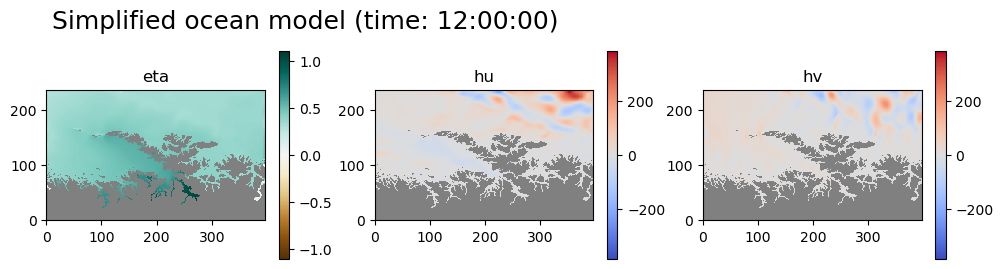

In [6]:
# Create simulation object
sim = GPUOceanSim.GPUOceanSim(gpu_ctx, **NetCDFInitialization.removeMetadata(sim_args))

# Option 1: 
# Run simulation directly and plot the solution only
sim.step(12*3600)
_, _ = PlotHelper.plotSim(sim, plot_title="Simplified ocean model")

# # Option 2:
# # Run and make animation / plot of solution for 12 hours using a utility function
# PlotHelper.simAnimation(sim, 12*3600, 1800, plot_title="Simplified ocean model")



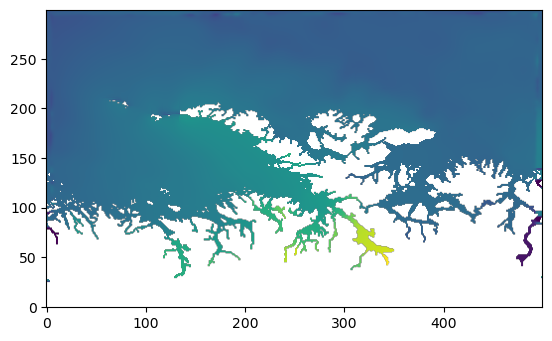

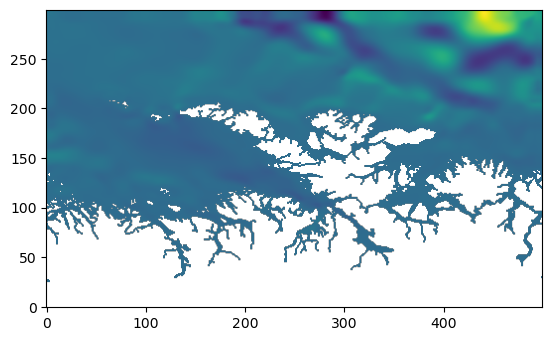

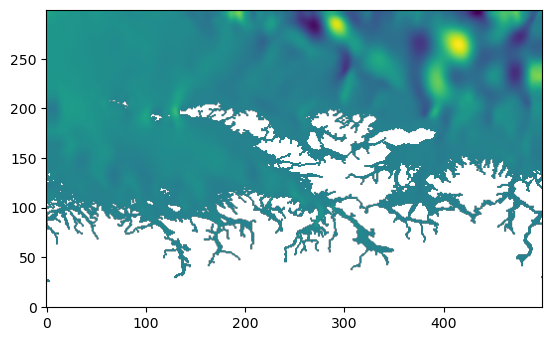

In [7]:
# Plot fields after GPU Ocean simulation

eta, hu, hv = sim.download()

plt.imshow(eta, origin='lower')
plt.show()
plt.imshow(hu, origin='lower')
plt.show()
plt.imshow(hv, origin='lower')

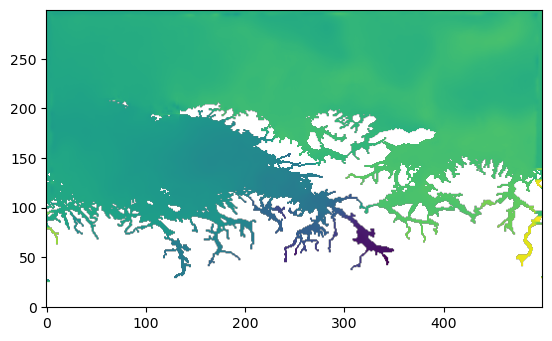

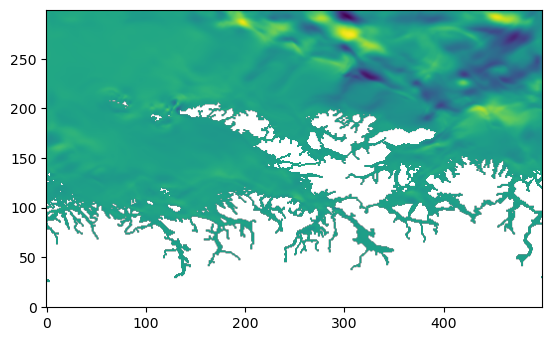

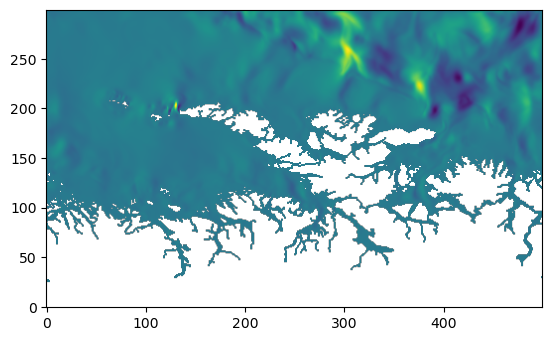

In [8]:
# Plot difference fields after GPU Ocean simulation (IC - last sim timestep)

eta, hu, hv = sim.download()

plt.imshow(sim_args['eta0']-eta, origin='lower')
plt.show()
plt.imshow(sim_args['hu0']-hu, origin='lower')
plt.show()
plt.imshow(sim_args['hv0']-hv, origin='lower')

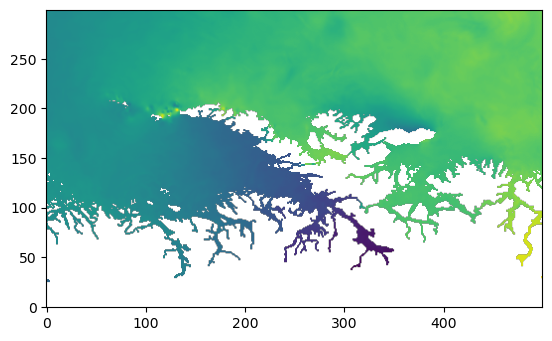

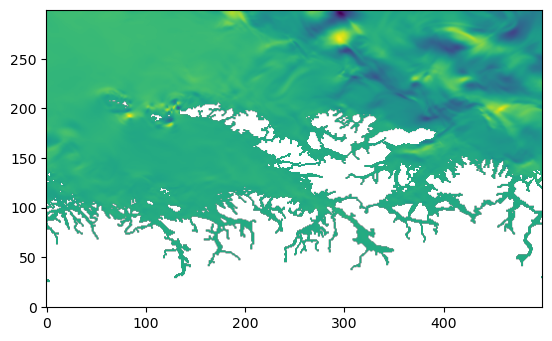

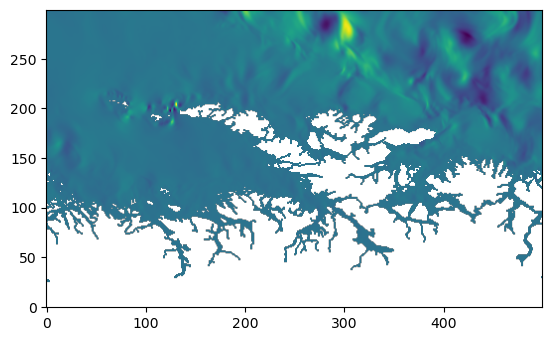

In [37]:
# Plot difference fields: GPU Ocean - Norkyst

eta, hu, hv = sim.download()

plt.imshow(sim_args['eta0']-sim_args_offset['eta0'], origin='lower')
plt.show()
plt.imshow(sim_args['hu0']-sim_args_offset['hu0'], origin='lower')
plt.show()
plt.imshow(sim_args['hv0']-sim_args_offset['hv0'], origin='lower')

# TODO
1. Run GPU Ocean simulator for x timesteps or until given time
2. Get final fields and plot side by side w/Norkyst fields
3. Make and plot difference
4. Animations?